
## **Project Abstract** ## 
To help people get started on their project and to make sure you are selecting an appropriate task, we will have all the teams submit an abstract. Please only submit one abstract per team.

The abstract should include (at least):

-Team members

-Problem statement

-Data you will use to solve the problem

-Outline of how you plan on solving the problem with the data. For example, what pre-processing steps might you need to do, what models, etc.

-Supporting documents if necessary citing past research in the area and methods used to solve the problem.

-The goal of this abstract is for you to think deeply about the project you will be undertaking and convince yourself (and us) that it is a meaningful and achievable project for this class.

This homework is due March 1, 2018 by midnight Utah time. and will be submitted on learning suite.

# Airbnb New User Bookings

## Team Members

- Alex Fabiano 
- Michael Clawson
- Elijah Broadbent 


## Problem Statement



With 34,000+ cities across 190+ countries, Airbnb users have a multitude of destinations from which to choose.  This vast array of possibilities creates problems for both users and Airbnb. New users may suffer choice overload and prolong their first booking. Irregular and prolonged first bookings can cause demand lags and inhibit demand predictability for Airbnb.
	
The goal of this data project is to accurately predict where new users will book their first Airbnb. This will enable Airbnb to share more personalized content and better forecast demand as well as improve user experience.


## Data

The data for this project comes from four separate files containing age and gender buckets, countries, websession, and a user set.  We will need to join the users and sessions sets into a training set while the remaining sets will serve as supplementary information to inform our data cleaning and analysis.

**Import Statements**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = [10,8]

In [2]:
test = pd.read_csv('test_users.csv')
XY_Age = pd.read_csv('age_gender_bkts.csv') #complicated and messy...consider doing last
countries = pd.read_csv('countries.csv')
users = pd.read_csv('train_users_2.csv')
sessions = pd.read_csv('sessions.csv')

Note that other refers to bookings made to a country not on this list while NDF corresponds to sessions in which no booking was ultimately made.

In [3]:
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [5]:
joined = pd.merge(users, sessions, left_on='id', right_on='user_id', how='inner')
joined.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Web,Windows Desktop,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Web,Windows Desktop,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Web,Windows Desktop,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Web,Windows Desktop,Chrome,other,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,Web,Windows Desktop,Chrome,other,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [6]:
joined.country_destination.value_counts(normalize=True, dropna=False)

NDF      0.552137
US       0.302553
other    0.057993
FR       0.026392
IT       0.018373
ES       0.012130
GB       0.011743
CA       0.007096
DE       0.004224
NL       0.004075
AU       0.002169
PT       0.001114
Name: country_destination, dtype: float64

In [7]:
print("Joined Length: {}\tSessions Length: {}\tUsers Length: {}".format(len(joined), len(sessions), len(users)))

Joined Length: 5537957	Sessions Length: 10567737	Users Length: 213451


## Data Cleaning and Feature Engineering

In [8]:
joined.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
user_id                     object
action                      object
action_type                 object
action_detail               object
device_type                 object
secs_elapsed               float64
dtype: object

In [9]:
# Create drop and dummy arrays
drop = []
dummies = []

In [10]:
# The following function locates the columns with null values and stores the column names in the 'null' array
def nulls():
    return joined.columns[joined.isnull().any()]

In [11]:
# Displays the columns with null values and the percent of null values for each column
print("Columns\t\t\t % Nulls")
joined[nulls()].isnull().sum()/len(joined)

Columns			 % Nulls


date_first_booking         0.552137
age                        0.381989
first_affiliate_tracked    0.000242
action                     0.009305
action_type                0.111929
action_detail              0.111929
secs_elapsed               0.013329
dtype: float64

Date of booking null values indicate that no booking was ever made, so it is not an issue with the dataset. Age is by far the most glaring issue with the data, and we are also missing almost half of the book dates. We may be able to find a way to fill the null values of age with the average ages dependent upon several other variables, ex: fill average ages of a female mac owners who use chrome.

**Date Account Created**

In [12]:
joined.date_account_created.describe() #Need to extract usable variables

count        5537957
unique           181
top       2014-06-09
freq           58902
Name: date_account_created, dtype: object

In [13]:
joined.date_account_created = pd.to_datetime(joined.date_account_created) #Casts object as datetime

In [14]:
# Create indicators for day of week (0=Mon, 6=Sun) account was created
joined['day_of_week_created'] = joined.date_account_created.dt.weekday
# Create indicators for day of month (0 through 31), month, and year account created
joined['day_of_month_created'] = joined['date_account_created'].dt.day
joined['month_created'] = joined['date_account_created'].dt.month
joined['year_created'] = joined['date_account_created'].dt.year

In [15]:
drop.append('date_account_created')

Do we really want date of first booking? It seems a bit silly to predict where people are booking when we already have the date. If we want to present something that's more realistic, we might want to try to predict based on historical info.

-- I think you make an excellent point...we should ask Tyler after class

**Date First Booking**

In [16]:
#Create variable for whether a user booked at all
joined['Booked?'] = np.where(joined['date_first_booking'].isnull(), 0, 1) 

In [17]:
joined.date_first_booking = pd.to_datetime(joined.date_first_booking)

In [18]:
joined['day_of_week_1stbook'] = joined['date_first_booking'].dt.weekday
joined['day_of_month_1stbook'] = joined['date_first_booking'].dt.day
joined['month_1stbook'] = joined['date_first_booking'].dt.month
joined['year_1stbook'] = joined['date_first_booking'].dt.year

In [19]:
drop.append('date_first_booking')

**Gender**

In [20]:
#What can we intuit from the gender variable?
joined['gender'].value_counts(normalize=True, dropna=False)

-unknown-    0.470218
FEMALE       0.291455
MALE         0.237007
OTHER        0.001320
Name: gender, dtype: float64

Unknown should be kept as a variable, and should not try to fill, given that it is very likely that the model will see unknown genders in the test set. 

In [21]:
dummies.append('gender')

**Age**

In [22]:
joined.age.describe()

count    3.422520e+06
mean     4.307446e+01
std      1.209079e+02
min      1.000000e+00
25%      2.700000e+01
50%      3.200000e+01
75%      4.100000e+01
max      2.014000e+03
Name: age, dtype: float64

In [24]:
print("% Individuals older than 100: {}".format(sum((joined.age > 100)/len(joined.age)).round(4)))
print("% Individuals younger than 18: {}".format((sum(joined.age < 18)/len(joined.age)).round(4)))

% Individuals older than 100: 0.0107
% Individuals younger than 18: 0.0005


According to the age distribution statistics, it appears that the data contains individuals with implausible ages exceeding 120 years. We may be better suited to only include individuals under the age of 100 in our analysis and modeling.

In [25]:
# Statistics on individuals with age less than 100
joined[joined.age<100]['age'].describe()

count    3.362844e+06
mean     3.474919e+01
std      1.140054e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.200000e+01
75%      4.000000e+01
max      9.900000e+01
Name: age, dtype: float64

Text(0.5,0,'PDF of Age')

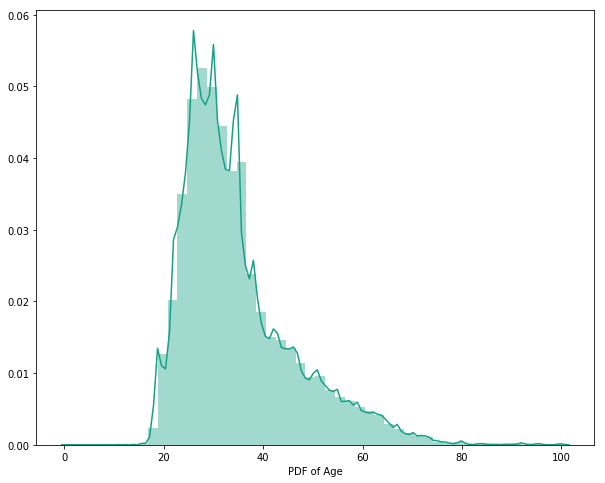

In [26]:
train_mean_age = np.mean(joined[joined.age<100]['age'])
sns.distplot(joined['age'].apply(lambda x : train_mean_age if x>100 else x).dropna(), color='#16A085')
plt.xlabel('PDF of Age')

Most of our dataset is comprised of 25-40-year-olds, and there is a small subset of users that are younger than the Airbnb terms of service allow to book rooms.
However, we will have to do something about the weird ages in the thousands.

In [27]:
#Change all unusable ages to NaN:
joined.loc[joined.age > 95, 'age'] = np.nan
joined.loc[joined.age < 13, 'age'] = np.nan
# Airbnb users must be 18 by law...so does 13 make sense?

Will need to revisit age variable after we've looked at the other variables that we could possibly extrapolate more targeted age data from.

In [28]:
# Here is a neat way to impute missing age values
mean_age = joined.age.mean()
std_age = joined.age.std()
rand1 = np.random.randint(mean_age-std_age, mean_age+std_age, size=joined.age.isnull().sum())

In [29]:
joined.age[joined.age.isnull()] = rand1

/Users/afabiano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The above is a warning, not an error...I would like to talk with Tyler about how to fix it though.

**Signup Method**

In [30]:
#??? Should this be made into dummies or not?
joined['signup_method'].value_counts(normalize=True, dropna=False)

basic       0.760209
facebook    0.228091
google      0.011701
Name: signup_method, dtype: float64

Signup Method is a rather straightforward dummy case, and there are no null values to fill in for, as per the null value analysis done previously in the notebook.

In [31]:
dummies.append('signup_method')

**Signup Flow**

The web page from which a user came to signup (discrete variable).

In [32]:
joined['signup_flow'].value_counts(normalize=True, dropna=False) #What is signup flow?

0     0.753918
25    0.124347
12    0.047303
23    0.047119
24    0.026038
8     0.001241
21    0.000034
Name: signup_flow, dtype: float64

In [33]:
dummies.append('signup_flow')

**Language**

In [34]:
joined.language.value_counts(normalize=True, dropna=False)

en    0.963830
zh    0.011210
ko    0.006149
fr    0.004241
es    0.003998
de    0.002495
it    0.001643
ru    0.001622
pt    0.001542
ja    0.001153
sv    0.000550
nl    0.000355
da    0.000227
fi    0.000196
el    0.000170
tr    0.000168
pl    0.000144
cs    0.000104
th    0.000074
id    0.000042
no    0.000031
hu    0.000027
is    0.000017
ca    0.000011
Name: language, dtype: float64

Since 96% of all users speak English, the language variable may provide little insight. Making dummies for all of the languages seems illogical. We could consider creating dummies for English (eh), Chinese (zh), Korean (ko), and an 'other' category.

In [35]:
joined.language = joined.language.apply(lambda x: x if str(x) == 'en' or str(x) == 'zh' else 'other')

In [36]:
dummies.append('language')

**Affiliate Channel**

In [37]:
joined.affiliate_channel.value_counts(normalize=True, dropna=False)

direct           0.643666
sem-brand        0.180315
sem-non-brand    0.076318
seo              0.043626
api              0.024776
content          0.012896
other            0.009933
remarketing      0.008470
Name: affiliate_channel, dtype: float64

In [38]:
dummies.append('affiliate_channel')

**Affiliate Provider**

In [39]:
joined.affiliate_provider.value_counts(normalize=True, dropna=False)

direct                 0.643666
google                 0.300429
other                  0.031685
bing                   0.011533
facebook               0.006710
padmapper              0.001999
yahoo                  0.001202
email-marketing        0.000861
facebook-open-graph    0.000598
naver                  0.000412
vast                   0.000386
baidu                  0.000174
gsp                    0.000163
yandex                 0.000093
meetup                 0.000044
daum                   0.000039
craigslist             0.000004
Name: affiliate_provider, dtype: float64

In [40]:
#??? Either make dummies for all or only the categories consisting of more than 3%
joined.affiliate_provider = joined.affiliate_provider.apply(lambda x: x if str(x) == 'direct' or str(x) == 'google'
                                                           else 'other' )
dummies.append('affiliate_provider')

**First Affiliate Tracked**

First marketing interacted with by the user before signing up.

In [41]:
joined.first_affiliate_tracked.value_counts(normalize=True, dropna=False)
#Maybe make a binary variable, tracked versus untracked?  Fill NaN's according to probability
#numpy.random.choice()

untracked        0.540652
omg              0.244296
linked           0.193608
tracked-other    0.011994
product          0.006936
marketing        0.001937
local ops        0.000336
NaN              0.000242
Name: first_affiliate_tracked, dtype: float64

In [42]:
dummies.append('first_affiliate_tracked')

**Signup App**

In [43]:
joined.signup_app.value_counts(normalize=True, dropna=False)

Web        0.753602
iOS        0.138516
Android    0.078525
Moweb      0.029357
Name: signup_app, dtype: float64

In [44]:
dummies.append('signup_app')

**First Device Type**

In [45]:
joined.first_device_type.value_counts(normalize=True, dropna=False)

Mac Desktop           0.391205
Windows Desktop       0.284525
iPhone                0.150347
iPad                  0.070700
Other/Unknown         0.049210
Android Phone         0.038839
Android Tablet        0.009258
Desktop (Other)       0.005656
SmartPhone (Other)    0.000260
Name: first_device_type, dtype: float64

In [46]:
dummies.append('first_device_type')

**First Browser**

In [47]:
joined.first_browser.value_counts(normalize=True, dropna=False)

Chrome                0.295958
Safari                0.207002
-unknown-             0.200526
Firefox               0.114218
Mobile Safari         0.097589
IE                    0.067559
Chrome Mobile         0.010101
Android Browser       0.003412
Opera                 0.000706
Silk                  0.000667
Chromium              0.000377
Mobile Firefox        0.000326
AOL Explorer          0.000261
Maxthon               0.000226
Apple Mail            0.000182
IE Mobile             0.000149
Yandex.Browser        0.000145
Sogou Explorer        0.000133
BlackBerry Browser    0.000093
SiteKiosk             0.000080
IceWeasel             0.000077
RockMelt              0.000053
CoolNovo              0.000040
Iron                  0.000032
Opera Mini            0.000025
IceDragon             0.000021
Pale Moon             0.000011
TenFourFox            0.000010
SeaMonkey             0.000006
Outlook 2007          0.000004
Avant Browser         0.000003
wOSBrowser            0.000003
Mozilla 

In [48]:
joined.first_browser = joined.first_browser.apply(lambda x: x if str(x) == 'Chrome' or str(x) == 'Safari' or
                                                 str(x) == '-unknown-' or str(x) == 'Firefox' or 
                                                  str(x) == 'Mobile Safari' or str(x) == 'IE' else 'other')

In [49]:
dummies.append('first_browser')

**Where possible, we should make sure the 'NDF' group is comparable on other observable characteristics. We can go back and add visualizations in the data cleaning section**

In [50]:
joined.country_destination.value_counts(normalize=True, dropna=False)

NDF      0.552137
US       0.302553
other    0.057993
FR       0.026392
IT       0.018373
ES       0.012130
GB       0.011743
CA       0.007096
DE       0.004224
NL       0.004075
AU       0.002169
PT       0.001114
Name: country_destination, dtype: float64

For now, I'm adding these to the drop array so we can more quickly get to modeling. We can work them in later if we so decide.

In [51]:
drop.extend(['user_id', 'action', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'])

In [52]:
joined.drop(drop, axis=1, inplace=True)

In [53]:
joined = pd.get_dummies(joined, columns=dummies)

In [54]:
joined.shape

(5537957, 68)

In [60]:
joined.drop('id', axis=1, inplace=True)

## Modeling

In [63]:
#Create train/test split
target = joined.country_destination
joined.drop(['country_destination'], axis=1, inplace=True)
xtrain, xtest, ytrain, ytest = train_test_split(joined, target, test_size=0.2, random_state=42)
print("%d items in training data, %d items in test data" % (len(xtrain), len(xtest)))

4430365 items in training data, 1107592 items in test data


### K-Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [65]:
kn_clf = KNeighborsClassifier()

In [66]:
gridsearch_kn = GridSearchCV(kn_clf, {"n_neighbors": [1,3,5,7,9,11], "weights": ['uniform', 'distance'],
                                  "p":[1,2,3]}, scoring='f1')
gridsearch_kn.fit(xtrain, ytrain)
print("Best Parameters: {}".format(gridsearch_kn.best_params_))
knclf_ypredict_train = gridsearch_kn.predict(xtrain)
print("Training F1 Score: {}".format(f1_score(ytrain, knclf_ypredict_train)))

print("Test Classification Report:")
knclf_ypredict_test = gridsearch_kn.predict(xtest)
print(classification_report(ytest, knclf_ypredict_test))

print("Train Accuracy: {}\nTest Accuracy: {}".format(accuracy_score(ytrain, knclf_ypredict_train), 
                                                     accuracy_score(ytest, knclf_ypredict_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Project Research

Based on the other Kaggle kernels for this project, a few different methods have been used to predict first booking location for new Airbnb users. Some competitors utilized the ensemble technique, incorporating up to three layers. One kaggler implemented a three tiered ensemble with six different models in each layer (Support Vector Machines, Logistic Regression, Random Forest, Gradient Boosting, Extra Trees Classifier, and K-Nearest Neighbors). Another kaggler coded a Normalized Discounted Cumulative Gain model, or NDCG, which is a type of ranking measure. This model relies on a logarithmic discounting factor and has achieved significant empirical results. However, little is known about the theoretical properties of NDCG models. Further information can be found at https://arxiv.org/abs/1304.6480 .

# Strategy

After merging our data and doing a minimal amount of initial cleaning, we will use a K-Neighbors Classifier to get a naive baseline for our classification problem.  From there we will modify our cleaning as needed to account for outliers, missing data, and optimal control variables in a more robust fashion.  Other models we plan to consult include Random Forest, regression, and Gradient Boosting.  Depending on the results we obtain from these methods we can complicate our approach using tiered-ensembles of multiple models.